# install requirements

In [7]:
!pip install langchain langgraph tavily-python sentence-transformers langchain-groq langchain-together -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 454.3/454.3 kB 12.5 MB/s eta 0:00:00


In [51]:
!pip install langchain_community chromadb -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 3.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 602.1/602.1 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 44.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.6/278.6 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 49.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.2/93.2 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 36.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.8/54.8 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.1 MB/s eta 0:00:00


# Import Libraries

In [156]:
import os
import json
import operator
from typing import Annotated, Sequence, TypedDict

from langchain import hub
from langchain_core.output_parsers import JsonOutputParser
from langchain.prompts import PromptTemplate, ChatPromptTemplate
from langchain.schema import Document
from langchain_community.tools.tavily_search import TavilySearchResults
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough
from langchain_openai.chat_models import ChatOpenAI

from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import Chroma
from langchain_community.embeddings.sentence_transformer import SentenceTransformerEmbeddings
from langchain_groq import ChatGroq
from langchain_core.pydantic_v1 import BaseModel, Field
from typing import List
from typing_extensions import TypedDict
from langchain.schema import Document
from langgraph.graph import END, StateGraph, START

# Set the environement & Variables

In [44]:
from google.colab import userdata
os.environ["GROQ_API_KEY"] = userdata.get('GROQ_API_KEY') #helps to access llm free of cost
os.environ["TAVILY_API_KEY"] = userdata.get('TAVILY_API_KEY')
os.environ["TOGETHER_API_KEY"] = userdata.get('TOGETHER_API_KEY') #helps to access llm free of cost

In [39]:
# model testing
from langchain_groq import ChatGroq
chat = ChatGroq(temperature=0, model_name="mixtral-8x7b-32768")
system = "You are a helpful assistant."
human = "{text}"
prompt = ChatPromptTemplate.from_messages([("system", system), ("human", human)])

chain = prompt | chat
chain.invoke({"text": "Explain the importance of low latency LLMs."})

AIMessage(content="Low latency Large Language Models (LLMs) are important for a variety of reasons, particularly in applications that require real-time or near real-time interactions. Here are some of the key reasons why low latency is important in LLMs:\n\n1. Improved user experience: In applications such as chatbots, search engines, and virtual assistants, users expect quick and responsive interactions. Low latency LLMs can provide instantaneous responses, which can significantly improve the user experience and increase user satisfaction.\n2. Real-time decision making: In some applications, such as autonomous vehicles, real-time decision making is critical for safety and efficiency. Low latency LLMs can provide quick and accurate responses, enabling real-time decision making and improving overall system performance.\n3. Reduced computational cost: Low latency LLMs can reduce the computational cost of running language models, as they require fewer computational resources to provide qu

In [48]:
# Querying code and language models with Together AI

from langchain_together import Together

llm = Together(
    model="meta-llama/Llama-3-70b-chat-hf",
    # together_api_key="..."
)

print(llm.invoke("Give me some reasons to learn AI"))

/usr/local/lib/python3.10/dist-packages/langchain_together/llms.py:89: UserWarning: The completions endpoint, has 'max_tokens' as required argument. The default value is being set to 200 Consider setting this value, when initializing LLM
  warnings.warn(


 and ML
Here are some compelling reasons to learn AI and ML:

**1. High Demand**: AI and ML are in high demand across industries, a trend that's expected to continue for the foreseeable future. As a result, professionals with AI and ML skills are highly sought after and well-compensated.

**2. Career Advancement**: Knowledge of AI and ML can open up new career opportunities and accelerate professional growth. It's a valuable skillset that can help you move up the career ladder or transition into a new field.

**3. Solving Real-World Problems**: AI and ML have the potential to solve some of humanity's most pressing problems, such as climate change, healthcare, and education. By learning AI and ML, you can contribute to creating positive impact in the world.

**4. Improved Decision Making**: AI and ML can help organizations make better decisions by analyzing large datasets and identifying patterns. By learning AI and ML, you can develop the skills to make data-driven decisions


In [54]:
from tavily import TavilyClient

# Step 1. Instantiating your TavilyClient
tavily_client = TavilyClient(api_key=userdata.get('TAVILY_API_KEY'))

# Step 2. Executing a simple search query
response = tavily_client.search("Who is Leo Messi?")

# Step 3. That's it! You've done a Tavily Search!
print(response)

{'query': 'Who is Leo Messi?', 'follow_up_questions': None, 'answer': None, 'images': [], 'results': [{'title': 'Lionel Messi | Biography, Competitions, Wins and Medals', 'url': 'https://olympics.com/en/athletes/lionel-messi', 'content': '“The Olympic gold in 2008 is the win that I value the most because it is a tournament that you may play only once in your life and involves many athletes from different disciplines” - Lionel Messi, Spanish Esquire\nFeatured\nLatest News\nOlympic Results\nAthlete Olympic Results Content\nYou may like Lionel MESSI\nBiography\nBorn in Rosario, Argentina in 1987 Lionel Messi is widely held to be one of the greatest football players of his generation — and with good reason.\n Graduating quickly through the club’s ranks thanks to his ever-growing skill set Messi made his first senior appearance for the club at the age of 17.\n When he eventually left the team in 2021 for French club Paris Saint-Germain the Argentine completed his time in La Liga as its top 

# Data Preparation

In [35]:

blog_url= "https://www.ibm.com/think/insights/artificial-intelligence-trends"

doc_loader= WebBaseLoader(blog_url)
docs = doc_loader.load()
docs[0].page_content = docs[0].page_content.replace("\n", "").replace("   ", "") # removing some extra spaces
print(len(docs[0].page_content))
print(docs[0].page_content[0:100])


24609
The Top Artificial Intelligence Trends | IBMThe most important AI trends in 2024TagsArtificial Intel


In [49]:
# Split
text_splitter = RecursiveCharacterTextSplitter.from_tiktoken_encoder(
    chunk_size=500, chunk_overlap=100
)
all_splits = text_splitter.split_documents(docs)
print(len(all_splits))

13


In [55]:
# Embed and index
embedding = SentenceTransformerEmbeddings(model_name="BAAI/bge-base-en-v1.5")

# Index
vectorstore = Chroma.from_documents(
    documents=all_splits,
    collection_name="rag-chroma",
    embedding=embedding,
)


In [116]:
retriever = vectorstore.as_retriever()

# Define LLM

In [148]:
# TOGETHER_API_KEY = os.environ.get("TOGETHER_API_KEY")
# llm = ChatOpenAI(base_url="https://api.together.xyz/v1",
#                  api_key=TOGETHER_API_KEY,
#                  model = "NousResearch/Nous-Hermes-2-Mixtral-8x7B-DPO")

In [154]:
# from langchain_core.prompts import ChatPromptTemplate
# from langchain_groq import ChatGroq

In [153]:
# chat = ChatGroq(temperature=0, model_name="llama-3.3-70b-versatile")
# system = "You are a helpful assistant."
# human = "{text}"
# prompt = ChatPromptTemplate.from_messages([("system", system), ("human", human)])

# chain = prompt | chat
# chain.invoke({"text": "Explain the importance of low latency LLMs."})

In [184]:
llm= ChatGroq(temperature=0, model_name="llama-3.3-70b-versatile")

In [157]:
# lm = ChatOpenAI(base_url="https://api.together.xyz/v1",
#                  api_key=userdata.get('TOGETHER_API_KEY'),
#                  model = "NousResearch/Nous-Hermes-2-Mixtral-8x7B-DPO")

In [158]:
llm

Together(together_api_key=SecretStr('**********'), model='meta-llama/Llama-3-70b-chat-hf', max_tokens=200)

# Define Nodes & Create Graph

In [186]:
from langchain_core.messages import BaseMessage

In [185]:
#create Graph state (storage dict)
class GraphState(TypedDict):
  """Represent the state of graph,
      keys: A dictionary where each key is a string.
  """
  keys: dict[str, any]


In [187]:
# Retriever

def retrieve(state):
  """This node will retrieve document from vector DB based on given Question
  Arguments:
  state:dict: The current graph state
  returns:
  state:dict: updated graph state with retrieved documents"""
  print("Retriving the documents:")
  state_dict= state['keys']
  question = state_dict['question']
  documents= retriever.get_relevant_documents(question)
  print(documents)
  return {"keys": {"documents": documents, "question": question}}



In [201]:
def grade_documents(state):
    """
    Determines whether the retrieved documents are relevant to the question.

    Args:
        state (dict): The current graph state

    Returns:
        state (dict): Updates documents key with relevant documents
    """

    print("---CHECK RELEVANCE---")
    state_dict = state["keys"]
    question = state_dict["question"]
    documents = state_dict["documents"]

    prompt = PromptTemplate(
        template="""You are a grader assessing the relevance of a retrieved
        document to a user question. \n
        Here is the retrieved document: \n\n {context} \n\n
        Here is the user question: {question} \n
        If the document contains keywords related to the user question,
        grade it as relevant. \n
        It does not need to be a stringent test. The goal is to filter out
        erroneous retrievals. \n
        Give a binary score of 'yes' or 'no' score to indicate whether the document
        is relevant to the question. \n
        Provide the binary score as a JSON with a single key 'score' and no preamble
        or explanation.
        """,
        input_variables=["question", "context"],
    )

    chain = prompt | llm | JsonOutputParser()

    # Score
    filtered_docs = []
    search = "No"  # Default does not opt for web search to supplement retrieval
    for d in documents:
        score = chain.invoke(
            {
                "question": question,
                "context": d.page_content,
            }
        )
        print(score)
        grade = score["score"]
        if grade == "yes":
            print("---GRADE: DOCUMENT RELEVANT---")
            filtered_docs.append(d)
        else:
            print("---GRADE: DOCUMENT NOT RELEVANT---")
            search = "Yes"  # Perform web search
            continue

    return {
        "keys": {
            "documents": filtered_docs,
            "question": question,
            "run_web_search": search,
        }
    }
    # print("filtered docs : ", filtered_docs)

In [189]:
def transform_query(state):
    """
    Transform the query to produce a better question.

    Args:
        state (dict): The current graph state

    Returns:
        state (dict): Updates question key with a re-phrased question
    """

    print("---TRANSFORM QUERY---")
    state_dict = state["keys"]
    question = state_dict["question"]
    documents = state_dict["documents"]

    # Create a prompt template with format instructions and the query
    prompt = PromptTemplate(
        template="""You are generating questions that is well optimized for retrieval. \n
        Look at the input and try to reason about the underlying sematic intent / meaning. \n
        Here is the initial question:
        \n ------- \n
        {question}
        \n ------- \n
        Provide an improved question without any premable, only respond with the
        updated question: """,
        input_variables=["question"],
    )
    # Prompt
    chain = prompt | llm | StrOutputParser()

    better_question = chain.invoke({"question": question})

    return {
        "keys": {"documents": documents, "question": better_question,}
    }

In [190]:
def web_search(state):
    """
    Web search based on the re-phrased question using Tavily API.

    Args:
        state (dict): The current graph state

    Returns:
        state (dict): Web results appended to documents.
    """

    print("---WEB SEARCH---")
    state_dict = state["keys"]
    question = state_dict["question"]
    documents = state_dict["documents"]

    tool = TavilySearchResults()
    docs = tool.invoke({"query": question})
    web_results = "\n".join([d["content"] for d in docs])
    web_results = Document(page_content=web_results)
    print(web_results)
    documents.append(web_results)

    return {"keys": {"documents": documents, "question": question}}

In [191]:
def generate(state):
    """
    Generate answer

    Args:
        state (dict): The current graph state

    Returns:
        state (dict): New key added to state, generation, that contains generation
    """
    print("---GENERATE---")
    state_dict = state["keys"]
    question = state_dict["question"]
    documents = state_dict["documents"]

    # Prompt
    prompt = hub.pull("rlm/rag-prompt")

    # Post-processing
    def format_docs(docs):
        return "\n\n".join(doc.page_content for doc in docs)

    # Chain
    rag_chain = prompt | llm | StrOutputParser()

    # Run
    generation = rag_chain.invoke({"context": documents, "question": question})
    return {
        "keys": {"documents": documents, "question": question, "generation": generation}
    }

# Define the Graph Edges

In [197]:
def decide_to_generate(state):
    """
    Determines whether to generate an answer or re-generate a question for web search.

    Args:
        state (dict): The current state of the agent, including all keys.

    Returns:
        str: Next node to call
    """

    print("---DECIDE TO GENERATE---")
    state_dict = state["keys"]
    question = state_dict["question"]
    filtered_documents = state_dict["documents"]
    search = state_dict["run_web_search"]

    if search == "Yes":
        # All documents have been filtered check_relevance
        # We will re-generate a new query
        print("---DECISION: TRANSFORM QUERY and RUN WEB SEARCH---")
        return "transform_query"
    else:
        # We have relevant documents, so generate answer
        print("---DECISION: GENERATE---")
        return "generate"

# creating the langgraph structure

In [198]:
import pprint
from langgraph.graph import END, StateGraph, START, END

In [202]:
graph = StateGraph(GraphState)
graph.add_node("retrieve", retrieve)
graph.add_node("grader", grade_documents)
graph.add_node("transform_query", transform_query)
graph.add_node("web_search", web_search)
graph.add_node("generate", generate)

## adding edges (connecting nodes with each other)
graph.set_entry_point("retrieve")
graph.add_edge("retrieve", "grader")
graph.add_conditional_edges(
    "grader",
    decide_to_generate,
    {
        "transform_query": "transform_query",
        "generate": "generate",
    },
)

graph.add_edge("transform_query", "web_search")
graph.add_edge("web_search", "generate")
graph.add_edge("generate", END)
graph = graph.compile()


# Visualize the graph structure

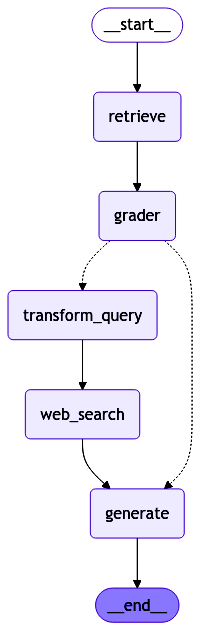

In [194]:
from PIL import Image, ImageEnhance
from IPython.display import display
import io

# Assume `draw_mermaid_png()` returns raw PNG data as bytes
image_data = graph.get_graph().draw_mermaid_png()

# Convert the raw PNG data into a BytesIO object
image = Image.open(io.BytesIO(image_data))

# Enhance the contrast of the image
enhancer = ImageEnhance.Contrast(image)
enhanced_image = enhancer.enhance(2)  # Adjust the factor for desired contrast

# Display the enhanced image
display(enhanced_image)


# Trigger/Run the workflow

In [204]:
inputs = {
    "keys": {
        "question": "How do multimodal models differ from traditional models that focus on a specific domain?",
    }
}
for output in graph.stream(inputs):
    for key, value in output.items():
        # Node
        pprint.pprint(f"Node '{key}':")

    pprint.pprint("\n---\n")

# Final generation
pprint.pprint(value["keys"]["generation"])

Retriving the documents:
[Document(metadata={'description': 'Adapting to emerging trends is essential to maximizing potential, minimizing risk and responsibly scaling generative AI adoption.', 'language': 'en', 'source': 'https://www.ibm.com/think/insights/artificial-intelligence-trends', 'title': 'The Top Artificial Intelligence Trends | IBM'}, page_content='implemented as integrated elements of enterprise environments that enhance and complement, rather than revolutionize or replace, existing tools: for example, “Copilot” features in Microsoft Office, “Generative Fill” features in Adobe Photoshop or virtual agents in productivity and collaboration apps.Where generative AI first builds momentum in everyday workflows will have more influence on the future of AI tools than the hypothetical upside of any specific AI capabilities. According to a recent IBM survey of over 1,000 employees at enterprise-scale companies, the top three factors driving AI adoption were advances in AI tools that

/usr/local/lib/python3.10/dist-packages/langsmith/client.py:261: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(


"Node 'generate':"
'\n---\n'
('Multimodal models differ from traditional models in that they can take '
 'multiple types of data as input, such as text, images, and video, and '
 'process them together. This allows for more intuitive and versatile AI '
 'applications and virtual assistants. Unlike traditional models that focus on '
 'a specific domain, multimodal models can move freely between different data '
 'modalities, such as natural language processing and computer vision tasks.')


In [206]:
inputs = {
    "keys": {
        "question": "How do text-to-image and speech-to-text models relate to the concept of multimodal AI, and what is their typical function?",
    }
}
for output in graph.stream(inputs):
    for key, value in output.items():
        # Node
        pprint.pprint(f"Node '{key}':")

    pprint.pprint("\n---\n")

# Final generation
pprint.pprint(value["keys"]["generation"])

Retriving the documents:
[Document(metadata={'description': 'Adapting to emerging trends is essential to maximizing potential, minimizing risk and responsibly scaling generative AI adoption.', 'language': 'en', 'source': 'https://www.ibm.com/think/insights/artificial-intelligence-trends', 'title': 'The Top Artificial Intelligence Trends | IBM'}, page_content='implemented as integrated elements of enterprise environments that enhance and complement, rather than revolutionize or replace, existing tools: for example, “Copilot” features in Microsoft Office, “Generative Fill” features in Adobe Photoshop or virtual agents in productivity and collaboration apps.Where generative AI first builds momentum in everyday workflows will have more influence on the future of AI tools than the hypothetical upside of any specific AI capabilities. According to a recent IBM survey of over 1,000 employees at enterprise-scale companies, the top three factors driving AI adoption were advances in AI tools that

/usr/local/lib/python3.10/dist-packages/langsmith/client.py:261: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(


"Node 'generate':"
'\n---\n'
('Text-to-image and speech-to-text models play a crucial role in multimodal '
 'AI, enabling the processing and generation of different forms of data. These '
 'models can operate in multiple directions, taking various types of data as '
 'input, such as text, images, and audio, and generating outputs like images, '
 'text, or speech. They function by using encoders to process individual '
 'modalities, which are then mapped onto a unified latent space using fusion '
 'networks, allowing for more intuitive and versatile AI applications.')
